In [ ]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=2748f8004dee8b538d2a2dc20149ca88f975f4c1a8c778bfcec0c3ea8522e255
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [ ]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregue seu conjunto de dados sobre qualidade de maçãs
df = pd.read_csv('apple_quality.csv')

# Exclua colunas não numéricas
df = df.select_dtypes(include=[np.number])

# Selecione as primeiras 800 linhas
df = df.head(800)

# Selecione as colunas relevantes
features = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

# Normalização dos dados
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Configuração dos parâmetros do SOM
som_shape = (10, 10)  # Ajuste de acordo com o tamanho desejado
input_len = normalized_features.shape[1]
sigma = 1.0
learning_rate = 0.5
num_epochs = 100

# Inicialização e treinamento do SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(normalized_features)
som.train_batch(normalized_features, num_epochs, verbose=True)

# Obtenha as coordenadas de cada amostra no mapa
mapped_data = som.win_map(normalized_features)

# Visualização dos resultados
plt.figure(figsize=(10, 10))
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        cluster_data = np.vstack(mapped_data.get((i, j), []))  # Converta para uma matriz 2D
        if cluster_data.size > 0:
            plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}-{j}')

plt.title('Self-Organizing Map - Quality of Apples')
plt.legend()
plt.show()


 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.880864737258404
[[0.2379246  0.59196792 0.39843221 0.54007246 0.33825131 0.3367953
  0.37695505 0.38114069 0.31807887 0.30454345 0.23141697 0.42926789
  0.3305624  0.32791442 0.2849764  0.43699476 0.40851434 0.31410478]
 [0.31498341 0.80654662 0.55376598 0.54947283 0.63308342 0.51386262
  0.46036338 0.57640496 0.60609161 0.43322052 0.50620378 0.44734945
  0.54710134 0.44459398 0.70559772 0.6378363  0.86876474 0.37335897]
 [0.25830327 0.54556793 0.44224405 0.43068084 0.78968761 0.578267
  0.45942877 0.44747593 0.65943207 0.56588181 0.61057967 0.49211111
  0.4467449  0.6097813  0.53700625 0.58440794 0.62956592 0.36391371]
 [0.41578144 0.52964824 0.55936272 0.49927674 0.43646501 0.61111842
  0.45581277 0.55707249 0.57439568 0.5900296  0.56104867 0.63796841
  0.57259784 0.56680729 0.58093095 0.54136747 0.93512135 0.35633501]
 [0.45674103 0.56767484 0.50296904 0.48886978 0.50534615 0.41311915
  0.79496326 0.51337032 0.61931723 0.797

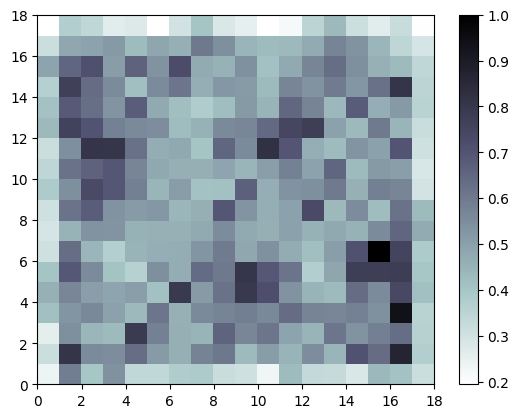

In [ ]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregue seu conjunto de dados sobre qualidade de maçãs
df = pd.read_csv('apple_quality.csv')

# Selecione as primeiras 800 linhas
df = df.head(800)

# Selecione as colunas relevantes
features = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

# Normalização dos dados
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Configuração dos parâmetros do SOM
som_shape = (18, 18)  # Ajuste de acordo com o tamanho desejado
input_len = normalized_features.shape[1]
sigma = 1.0
learning_rate = 0.5
num_epochs = 100

# Inicialização e treinamento do SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(normalized_features)
som.train_batch(normalized_features, num_epochs, verbose=True)

# Obtenha as coordenadas de cada amostra no mapa
mapped_data = som.win_map(normalized_features)

u_matrix = som.distance_map().T
print(u_matrix)
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

Treinando o SOM...


<ipython-input-7-1ed1399d106e>:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(prototype[0], prototype[1], marker='o', label=f'Cluster {i}-{j}', s=200, c=colors[i * som_grid_columns + j])
<ipython-input-7-1ed1399d106e>:61: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', label=f'Cluster {i}-{j}', s=20, c=colors[i * som_grid_columns + j], alpha=0.7)
<i

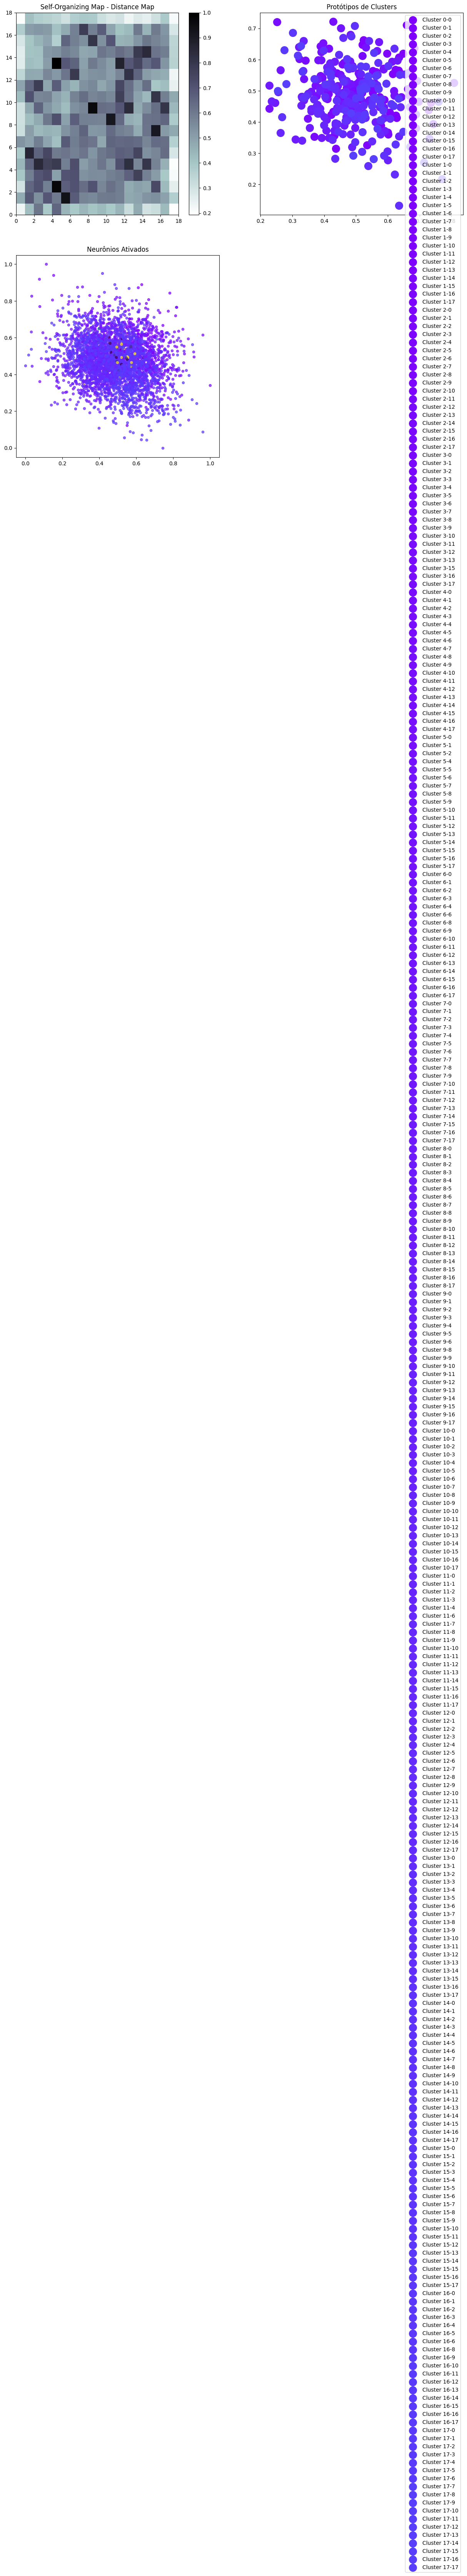

In [ ]:
import pandas as pd
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Carregar os dados do CSV
data = pd.read_csv('apple_quality.csv')

# Remover a primeira e última coluna (A_id e Quality)
data = data.drop(columns=['A_id', 'Quality'])

# Normalizar os dados
data_normalized = (data - data.min()) / (data.max() - data.min())

# Definir os parâmetros do SOM
som_grid_rows = 18
som_grid_columns = 18
input_len = len(data.columns)
sigma = 1.0
learning_rate = 0.5
iterations = 1000

# Inicializar o SOM
som = MiniSom(som_grid_rows, som_grid_columns, input_len, sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(data_normalized.values)
print("Treinando o SOM...")
som.train_random(data_normalized.values, iterations)

# Plotar o SOM e os dados de entrada
plt.figure(figsize=(15, 15))

# Visualização do SOM com mapa de calor de distâncias
plt.subplot(2, 2, 1)
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plot the distance map as background
plt.colorbar()
plt.title('Self-Organizing Map - Distance Map')

# Mapa de cores para os marcadores dos dados
colors = cm.rainbow(np.linspace(0, 1, len(data)))

# Visualização de Protótipos de Clusters
plt.subplot(2, 2, 2)
for i in range(som_grid_rows):
    for j in range(som_grid_columns):
        cluster_data = som.win_map(data_normalized.values).get((i, j), [])
        if cluster_data:
            cluster_data = np.vstack(cluster_data)  # Converta para uma matriz 2D se o cluster não for vazio
            prototype = np.mean(cluster_data, axis=0)
            plt.scatter(prototype[0], prototype[1], marker='o', label=f'Cluster {i}-{j}', s=200, c=colors[i * som_grid_columns + j])
plt.title('Protótipos de Clusters')
plt.legend()

# Visualização de Neurônios Ativados
plt.subplot(2, 2, 3)
for i in range(som_grid_rows):
    for j in range(som_grid_columns):
        cluster_data = som.win_map(data_normalized.values).get((i, j), [])
        if cluster_data:
            cluster_data = np.vstack(cluster_data)  # Converta para uma matriz 2D se o cluster não for vazio
            plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker='o', label=f'Cluster {i}-{j}', s=20, c=colors[i * som_grid_columns + j], alpha=0.7)
plt.title('Neurônios Ativados')

plt.tight_layout()
plt.show()


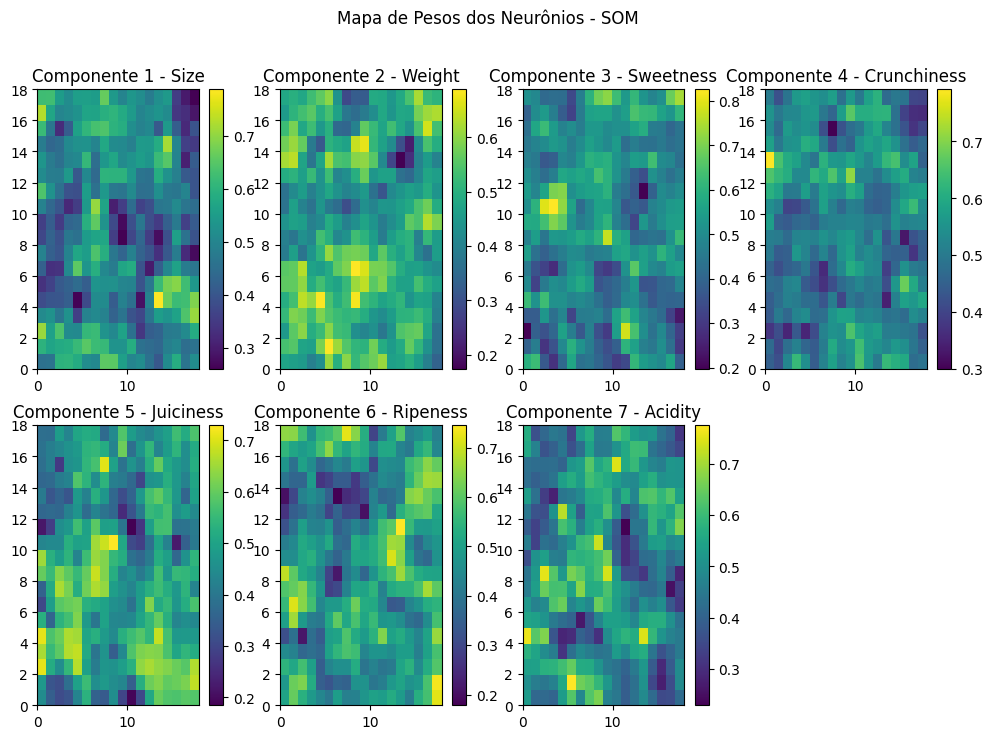

In [ ]:
# Obter os pesos dos neurônios
weights = som.get_weights().reshape((som_grid_rows * som_grid_columns, input_len))

# Plotar os pesos dos neurônios
plt.figure(figsize=(12, 8))
for i in range(input_len):
    plt.subplot(2, 4, i+1)
    plt.pcolor(weights[:, i].reshape((som_grid_rows, som_grid_columns)), cmap='viridis')
    plt.colorbar()
    plt.title(f'Componente {i+1} - {data.columns[i]}')

plt.suptitle('Mapa de Pesos dos Neurônios - SOM')
plt.show()

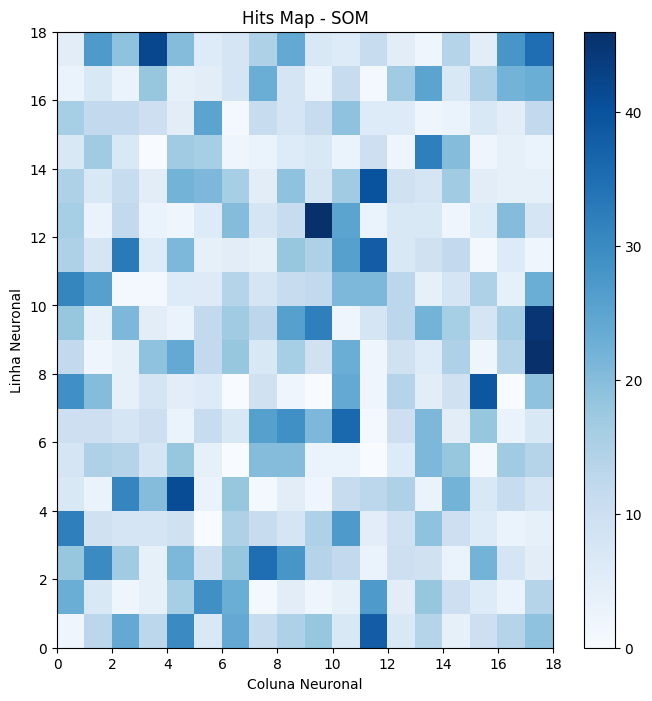

In [ ]:
# Obter o hits map
hits_map = som.activation_response(data_normalized.values)

# Plotar o hits map
plt.figure(figsize=(8, 8))
plt.pcolor(hits_map.T, cmap='Blues')  # Use o colormap 'Blues'
plt.colorbar()

plt.title('Hits Map - SOM')
plt.xlabel('Coluna Neuronal')
plt.ylabel('Linha Neuronal')
plt.show()

In [ ]:
# Encontrar as coordenadas do neurônio com o maior número de hits
coord_neuronio_maior_hits = np.unravel_index(np.argmax(hits_map, axis=None), hits_map.shape)

# Imprimir as coordenadas do neurônio com o maior número de hits
print("Coordenadas do Neurônio com Maior Número de Hits:", coord_neuronio_maior_hits)


Coordenadas do Neurônio com Maior Número de Hits: (9, 12)


In [ ]:
i = 9
j = 12
# Obter os pesos associados a esse neurônio
pesos_do_neuronio = som.get_weights()[i, j]

# Obter as coordenadas do neurônio na grade
coordenadas_do_neuronio = (i, j)

# Mapear os dados de treinamento para esse neurônio
dados_mapeados_do_neuronio = som.win_map(data_normalized.values)[coordenadas_do_neuronio]

# Imprimir as informações
print(f"Coordenadas do Neurônio: {coordenadas_do_neuronio}")
print(f"Pesos do Neurônio: {pesos_do_neuronio}")
print(f"Dados Mapeados para o Neurônio: {dados_mapeados_do_neuronio}")


Coordenadas do Neurônio: (9, 12)
Pesos do Neurônio: [0.38401097 0.42405963 0.32757499 0.50509781 0.40931243 0.71172584
 0.33867712]
Dados Mapeados para o Neurônio: [array([0.46958909, 0.35432413, 0.30584075, 0.56192252, 0.38389455,
       0.87103936, 0.33516866]), array([0.45657792, 0.45510572, 0.27488742, 0.38759006, 0.42908578,
       0.77139637, 0.33694739]), array([0.34418869, 0.47452068, 0.16832214, 0.47775773, 0.34678119,
       0.76589182, 0.34131692]), array([0.33650101, 0.44243497, 0.18869226, 0.50624913, 0.43699411,
       0.76344458, 0.29191101]), array([0.37482474, 0.38444558, 0.42377246, 0.55799092, 0.39768744,
       0.7631175 , 0.37128365]), array([0.42309524, 0.37216217, 0.37560042, 0.49438475, 0.50381488,
       0.71031328, 0.32648637]), array([0.35025711, 0.39641824, 0.32810845, 0.49181241, 0.46111016,
       0.66473307, 0.24111192]), array([0.38727718, 0.35461291, 0.23711418, 0.51436082, 0.39795394,
       0.6764579 , 0.19509811]), array([0.31223171, 0.47364189, 0.38

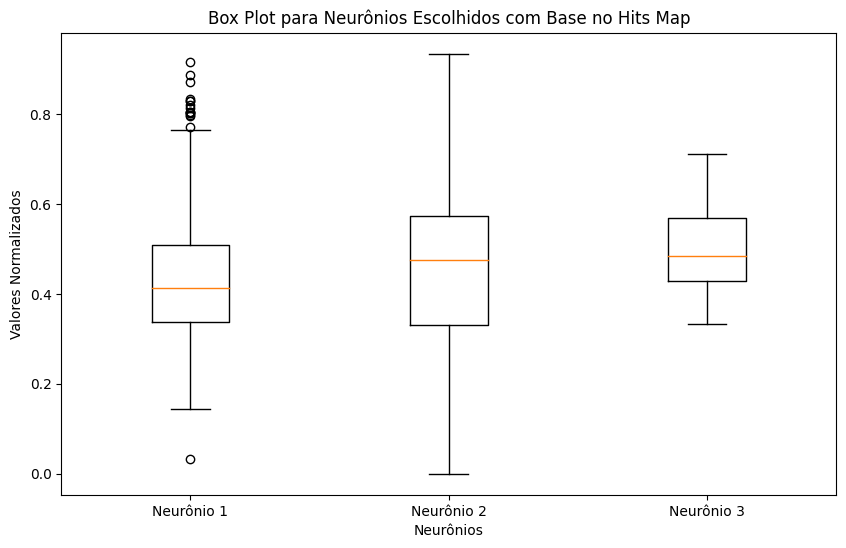

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Coordenadas dos neurônios escolhidos com base no Hits Map
coord_neuronio_1 = (9, 12)  # Substitua i1 e j1 pelas coordenadas do primeiro neurônio
coord_neuronio_2 = (0, 10)  # Substitua i2 e j2 pelas coordenadas do segundo neurônio
coord_neuronio_3 = (7, 15)  # Substitua i3 e j3 pelas coordenadas do terceiro neurônio

# Mapear os dados de treinamento para esses neurônios
dados_mapeados_neuronio_1 = som.win_map(data_normalized.values)[coord_neuronio_1]
dados_mapeados_neuronio_2 = som.win_map(data_normalized.values)[coord_neuronio_2]
dados_mapeados_neuronio_3 = som.win_map(data_normalized.values)[coord_neuronio_3]

# Preparar os dados para o box plot
dados_para_boxplot = [np.ravel(dados_mapeados_neuronio_1),
                      np.ravel(dados_mapeados_neuronio_2),
                      np.ravel(dados_mapeados_neuronio_3)]

# Plotar o box plot para os neurônios escolhidos
plt.figure(figsize=(10, 6))
plt.boxplot(dados_para_boxplot, labels=['Neurônio 1', 'Neurônio 2', 'Neurônio 3'])
plt.title('Box Plot para Neurônios Escolhidos com Base no Hits Map')
plt.xlabel('Neurônios')
plt.ylabel('Valores Normalizados')
plt.show()

In [ ]:
# Verificar comprimento dos dados mapeados para cada neurônio
print(len(dados_mapeados_neuronio_1))
print(len(dados_mapeados_neuronio_2))
print(len(dados_mapeados_neuronio_3))

# Verificar as coordenadas do neurônio no Hits Map
print(f"Coordenadas Neurônio 1: {coord_neuronio_1}")
print(f"Coordenadas Neurônio 2: {coord_neuronio_2}")
print(f"Coordenadas Neurônio 3: {coord_neuronio_3}")

46
31
11
Coordenadas Neurônio 1: (9, 12)
Coordenadas Neurônio 2: (0, 10)
Coordenadas Neurônio 3: (7, 15)


In [ ]:
# Obter o hits map
hits_map = som.activation_response(data_normalized.values)

# Coordenadas dos neurônios selecionados
neuronios_selecionados = [(i1, j1), (i2, j2), (i3, j3)]  # Substitua pelos índices desejados

# Plotar o hits map
plt.figure(figsize=(8, 8))
plt.pcolor(hits_map.T, cmap='Blues')  # Use o colormap 'Blues'

# Adicionar marcadores para os neurônios selecionados
for coord in neuronios_selecionados:
    plt.plot(coord[1] + 0.5, coord[0] + 0.5, 'ro', markersize=10)  # +0.5 para centralizar o marcador

plt.colorbar()
plt.title('Hits Map - SOM com Neurônios Selecionados')
plt.xlabel('Coluna Neuronal')
plt.ylabel('Linha Neuronal')
plt.show()
